In [1]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Chemin vers le dossier contenant les fichiers TIFF
tiff_folder = "C:/Users/lenovo/Desktop/SEMESTRE_5/Statistique exploratoir spatiale/TP10"

In [3]:
bands = {}

# Charger chaque bande
for filename in os.listdir(tiff_folder):
    if filename.endswith(".tiff"):
        band_name = filename.split("_")[-2]  # Identifier les bandes par leur nom (e.g., B01, B02)
        filepath = os.path.join(tiff_folder, filename)
        with rasterio.open(filepath) as src:
            bands[band_name] = src.read(1).astype('float32')  # Charger la première couche en float32

# Vérification des bandes chargées
print("Bandes disponibles :", bands.keys())

Bandes disponibles : dict_keys(['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08'])


In [5]:
required_bands = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08']
for band in required_bands:
    if band not in bands:
        raise ValueError(f"La bande {band} est manquante dans les données chargées.")

# Extraction des bandes
b01 = bands['B01']
b02 = bands['B02']
b03 = bands['B03']
b04 = bands['B04']
b05 = bands['B05']
b06 = bands['B06']
b07 = bands['B07']
b08 = bands['B08']

Affichage des bandes (matrices)

In [7]:
print("bande B01",b01)
print("bande B02",b02)
print("bande B03", b03)
print("bande B04",b04)
print("bande B05", b05)
print("bande B06", b06)
print("bande B07", b07)
print("bande B08",b08)

bande B01 [[2353. 2287. 2326. ... 1724. 1802. 1835.]
 [2425. 2549. 2576. ... 2202. 2209. 1914.]
 [2412. 2523. 2510. ... 2713. 2510. 2268.]
 ...
 [1920. 1933. 1966. ... 1986. 2392. 2136.]
 [1946. 1966. 1953. ... 1455. 3441. 3722.]
 [1914. 1940. 1933. ... 1357. 2438. 2549.]]
bande B02 [[2130. 2077. 2077. ... 3598. 3467. 3539.]
 [2228. 2346. 2340. ... 4102. 4109. 3618.]
 [2281. 2346. 2274. ... 4856. 4581. 4201.]
 ...
 [1907. 1887. 1901. ... 3781. 3808. 3473.]
 [1868. 1861. 1920. ... 3028. 5341. 5833.]
 [1861. 1920. 1894. ... 3015. 4574. 3323.]]
bande B03 [[1520. 1488. 1481. ... 5826. 5603. 5544.]
 [1625. 1756. 1730. ... 6606. 6567. 5852.]
 [1625. 1809. 1704. ... 7923. 7235. 6658.]
 ...
 [1206. 1199. 1226. ... 6193. 6042. 5557.]
 [1186. 1153. 1206. ... 5040. 7346. 8087.]
 [1153. 1206. 1212. ... 5407. 6560. 5335.]]
bande B04 [[ 1252.  1153.  1173. ...  8480.  8126.  8369.]
 [ 1239.  1416.  1402. ... 10282.  9850.  8546.]
 [ 1363.  1435.  1337. ... 12301. 10610. 10073.]
 ...
 [  826.   819. 

Calcul des indices

In [9]:
# Calcul des indices spectraux

# 1. NDVI
ndvi = (b08 - b04) / (b08 + b04)
ndvi = np.nan_to_num(ndvi, nan=0.0)  # Remplacer NaN par 0

print("NDVI", ndvi)

# 2. ANDWI
andwi = (b03 - b08) / (b03 + b08)
andwi = np.nan_to_num(andwi, nan=0.0)
print("ANDWI", andwi)

# 3. BRBA
brba = (b05 - b04) / (b05 + b04)
brba = np.nan_to_num(brba, nan=0.0)
print("BARBA", brba)

# 4. GNDVI
gndvi = (b08 - b03) / (b08 + b03)
gndvi = np.nan_to_num(gndvi, nan=0.0)
print("GNDVI", gndvi)

# 5. SAVI
L = 0.5
savi = ((b08 - b04) * (1 + L)) / (b08 + b04 + L)
savi = np.nan_to_num(savi, nan=0.0)
print("SAVI", savi)

# 6. kIPVI
kipvi = b08 / (b08 + b04)
kipvi = np.nan_to_num(kipvi, nan=0.0)
print("kIPVI", kipvi)


NDVI [[-0.03257732 -0.01407212 -0.04966443 ...  0.37063974  0.37955257
   0.34747183]
 [-0.02992519 -0.12514898 -0.12025569 ...  0.2855505   0.33861545
   0.4132711 ]
 [-0.08346582 -0.02573267  0.00742391 ...  0.30365127  0.3520215
   0.32511473]
 ...
 [-0.1005996  -0.05        0.0264977  ...  0.37855503  0.4084584
   0.42691416]
 [-0.00805952 -0.04576977  0.04176334 ...  0.47065467  0.23604003
   0.2014069 ]
 [-0.03516921 -0.04918033 -0.05424378 ...  0.5431554   0.3168236
   0.41483125]]
ANDWI [[ 0.12885258  0.14066692  0.16476603 ... -0.52037543 -0.52659374
  -0.5142382 ]
 [ 0.16404012  0.22926146  0.22218297 ... -0.47377226 -0.50443345
  -0.55728716]
 [ 0.16990641  0.1406053   0.11336165 ... -0.48804602 -0.5073707
  -0.49629295]
 ...
 [ 0.28229666  0.23608248  0.15824279 ... -0.51811075 -0.5463964
  -0.55961484]
 [ 0.19436052  0.2525801   0.14638783 ... -0.5786129  -0.37552598
  -0.35291058]
 [ 0.22659574  0.23061225  0.24116744 ... -0.5926777  -0.46052632
  -0.5399474 ]]
BARBA [[ 0

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5632\1005241026.py:4: RuntimeWarning: invalid value encountered in divide
  ndvi = (b08 - b04) / (b08 + b04)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5632\1005241026.py:10: RuntimeWarning: invalid value encountered in divide
  andwi = (b03 - b08) / (b03 + b08)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5632\1005241026.py:15: RuntimeWarning: invalid value encountered in divide
  brba = (b05 - b04) / (b05 + b04)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5632\1005241026.py:20: RuntimeWarning: invalid value encountered in divide
  gndvi = (b08 - b03) / (b08 + b03)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5632\1005241026.py:31: RuntimeWarning: invalid value encountered in divide
  kipvi = b08 / (b08 + b04)


Visualisation des indices

Affichage de l'indice : NDVI


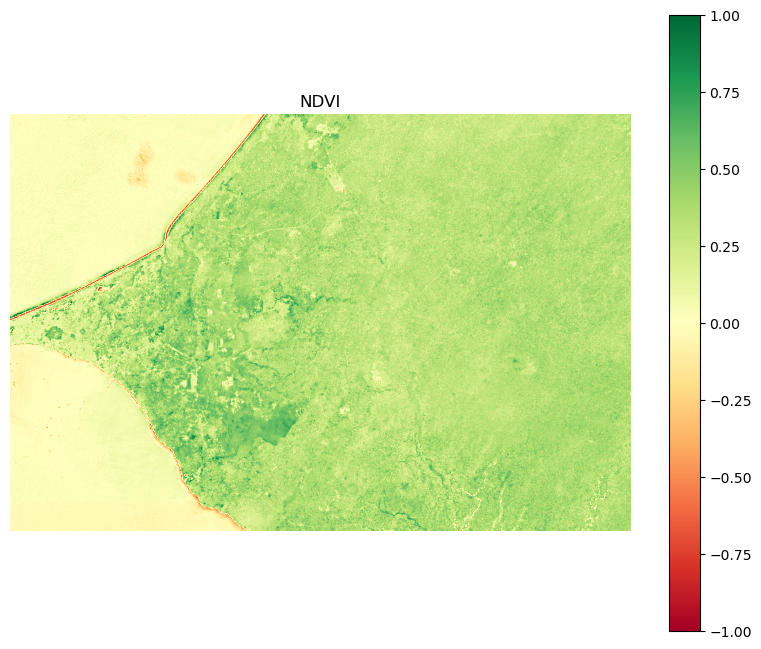

Affichage de l'indice : ANDWI


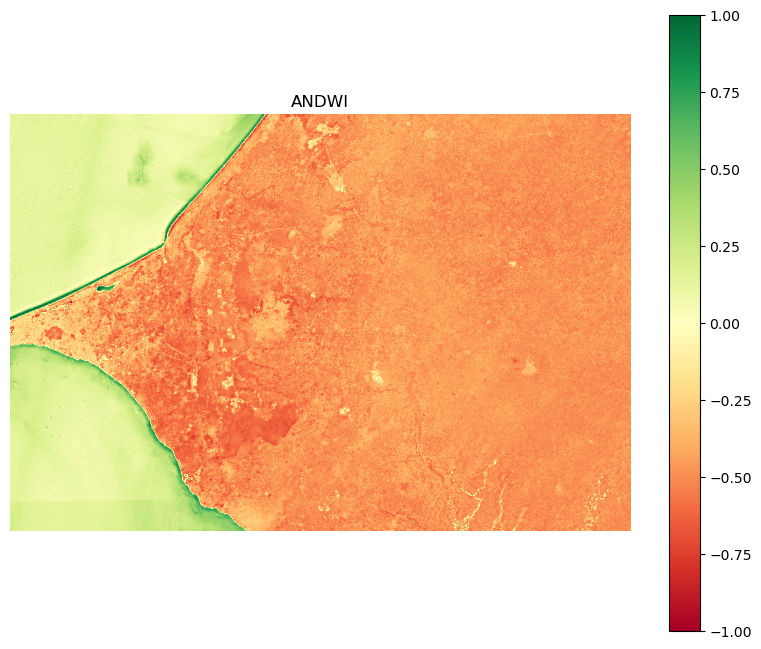

Affichage de l'indice : BRBA


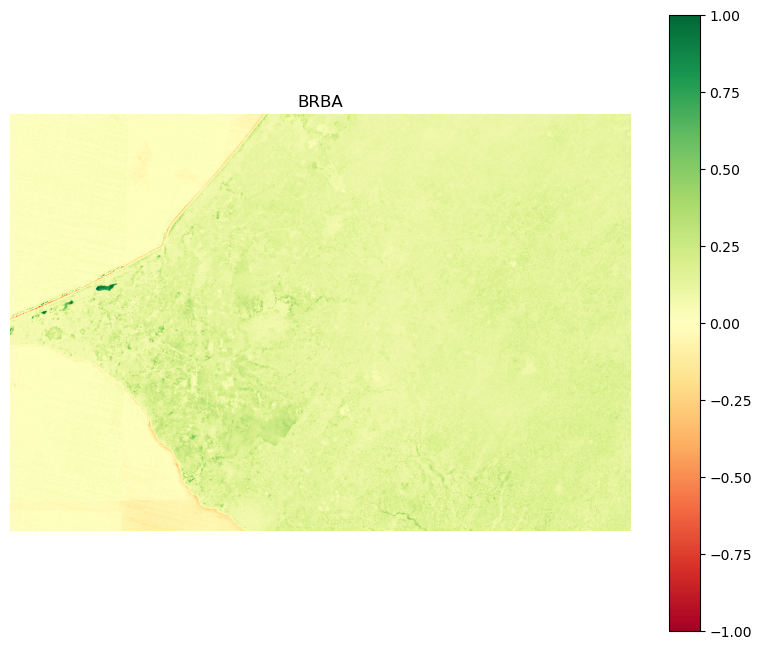

Affichage de l'indice : GNDVI


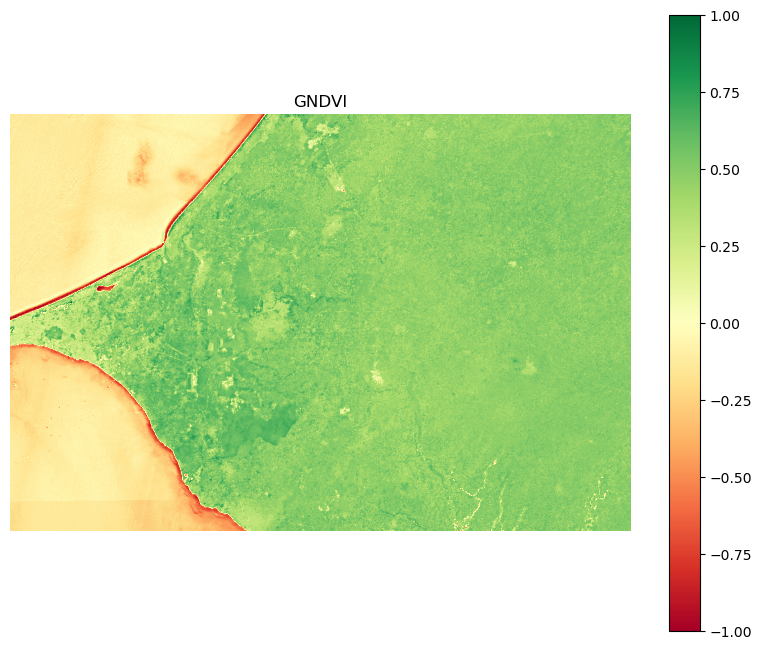

Affichage de l'indice : SAVI


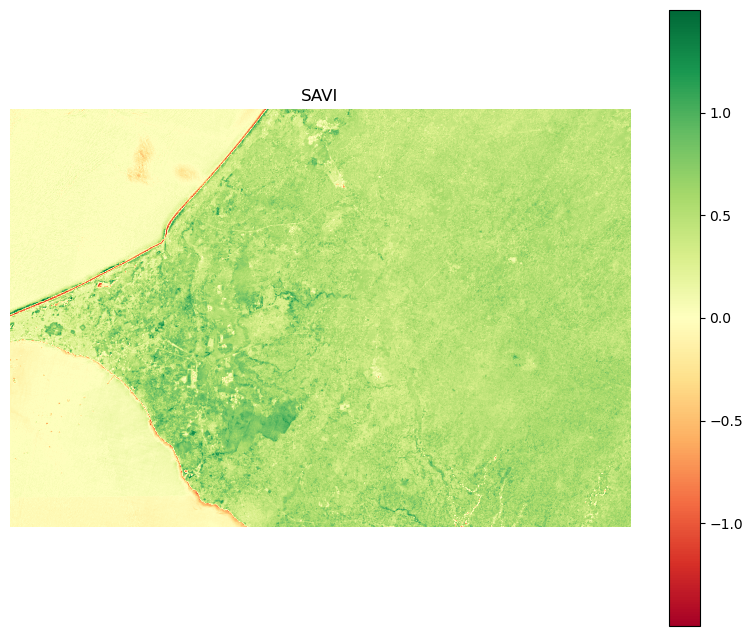

Affichage de l'indice : kIPVI


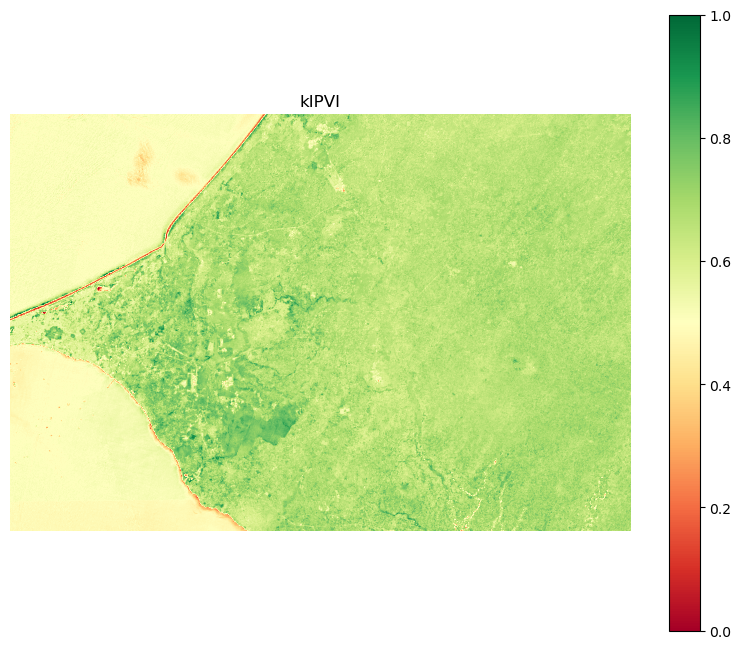

In [11]:
indices = {
    "NDVI": ndvi,
    "ANDWI": andwi,
    "BRBA": brba,
    "GNDVI": gndvi,
    "SAVI": savi,
    "kIPVI": kipvi,
}

# Fonction pour afficher les indices spectraux
def plot_index(index, title, cmap='RdYlGn'):
    plt.figure(figsize=(10, 8))
    plt.imshow(index, cmap=cmap)
    plt.colorbar()
    plt.title(title)
    plt.axis('off')
    plt.show()

# Afficher tous les indices
for name, index in indices.items():
    print(f"Affichage de l'indice : {name}")
    plot_index(index, name)

Méthode automatique

In [ ]:

# Installation de spyndex
!conda install conda-forge::spyndex
 # Importation des librairies   
import numpy as np
import xarray as xr
import spyndex
import matplotlib.pyplot as plt

# Renommage des bandes pour plus de clarté
bands = {
    "Coastal": b01,  # Bande 
    "Blue": b02,     # Bande bleue
    "Green": b03,    # Bande verte
    "Red": b04,      # Bande rouge
    "RedEdge": b05,  # Bord rouge
    "SWIR1": b06,    # SWIR1 (Proche infrarouge Ã  onde courte)
    "SWIR2": b07,    # SWIR2
    "NIR": b08       # Proche infrarouge (Near Infrared)
}

# Création d'un DataArray pour faciliter la manipulation
da = xr.DataArray(
    np.array([bands[key] for key in bands.keys()]),  # Toutes les bandes
    dims=("band", "x", "y"),
    coords={"band": list(bands.keys())}  # Noms des bandes
)

# Calcul de plusieurs indices en une seule commande
idx = spyndex.computeIndex(
    index=["NDVI", "SAVI", "GNDVI", "ANDWI", "BRBA", "kIPVI"],  # Liste des indices
    params={
        "N": da.sel(band="NIR"),       # Proche infrarouge
        "R": da.sel(band="Red"),       # Rouge
        "G": da.sel(band="Green"),     # Vert
        "B": da.sel(band="Blue"),      # Bleu
        "L": 0.5,                      # Paramètre pour SAVI
        "S1": da.sel(band="SWIR1"),    # SWIR1
        "S2": da.sel(band="SWIR2"),    # SWIR2
        "RE": da.sel(band="RedEdge")   # Bord rouge
    }
)